In [3]:
%matplotlib inline


# Teste


In [10]:
exec(open('MetricasTCC.py').read())

df = rules2.loc[:, 'support':].corr(method='pearson')
#print(df)



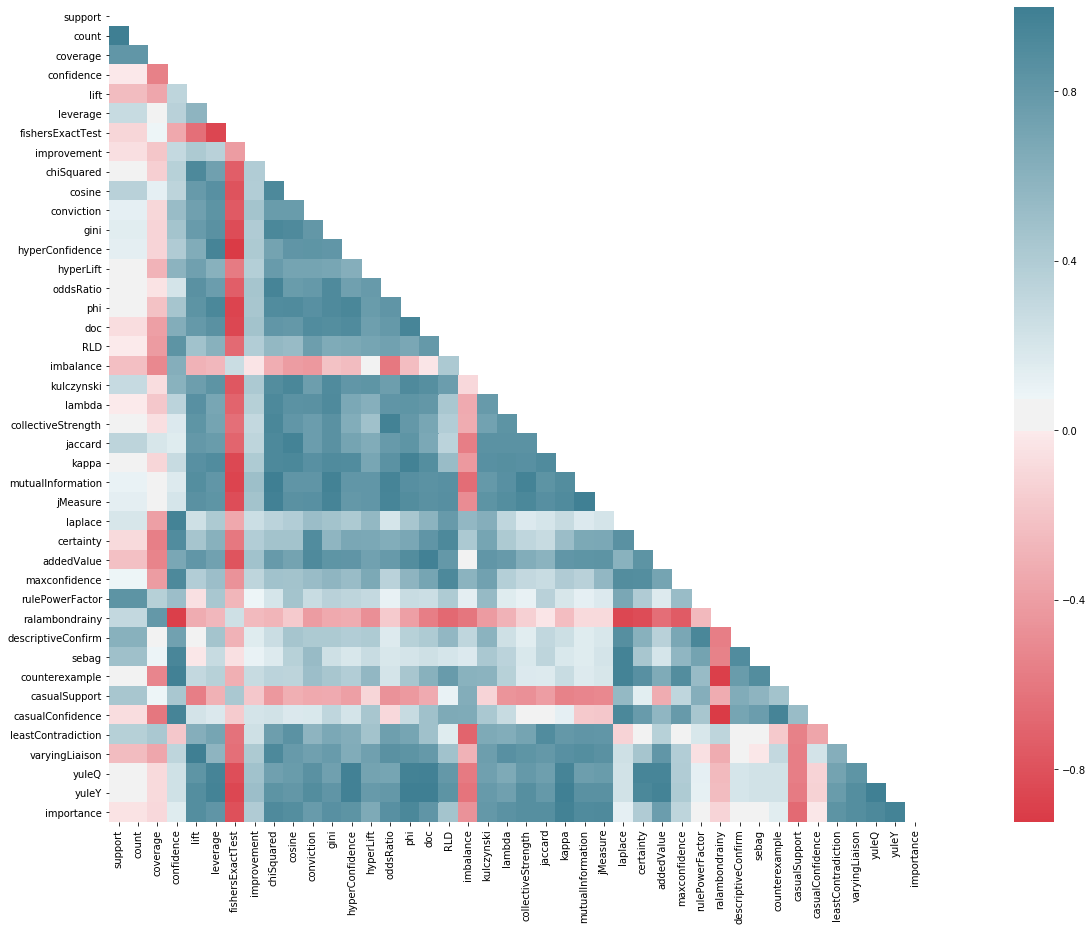

<Figure size 2304x1080 with 0 Axes>

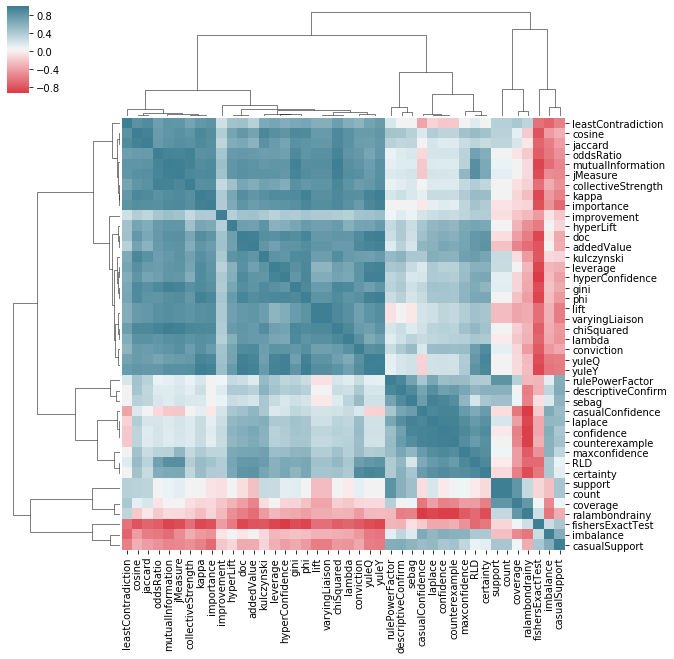

In [17]:
import seaborn as sns


mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(10, 220, as_cmap=True)
plt.figure(figsize=(32,15))
sns.heatmap(df, xticklabels=True, yticklabels=True, cmap=cmap, mask=mask, square=True)

sns.clustermap(df, xticklabels=True, yticklabels=True, metric='correlation', method='complete', cmap=cmap, square=False)

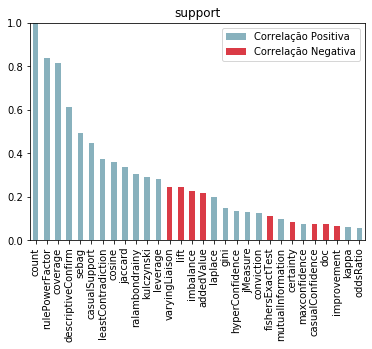

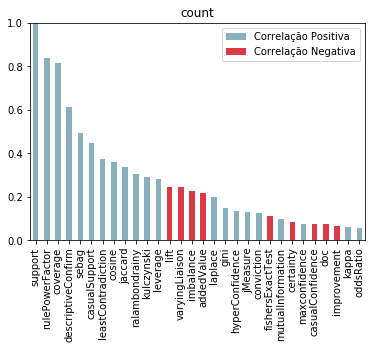

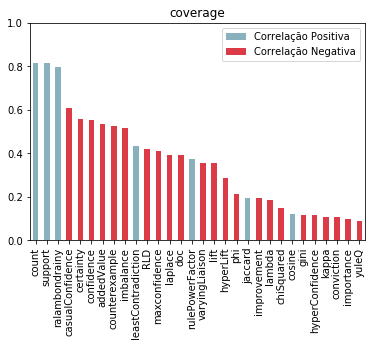

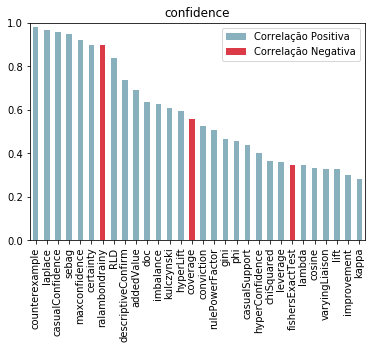

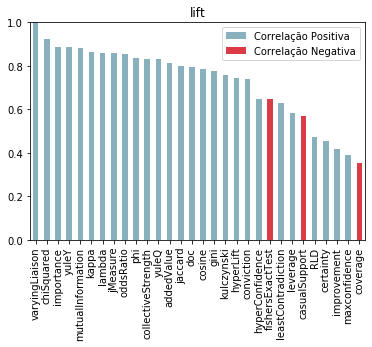

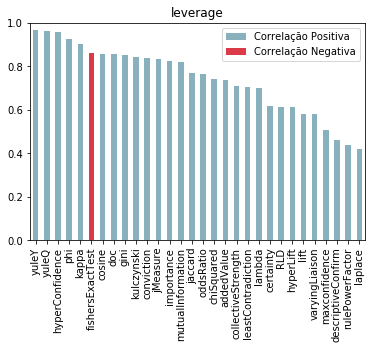

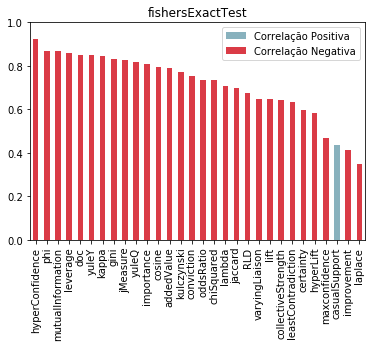

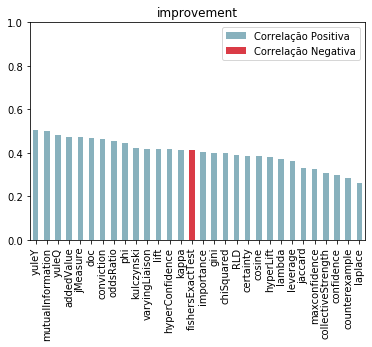

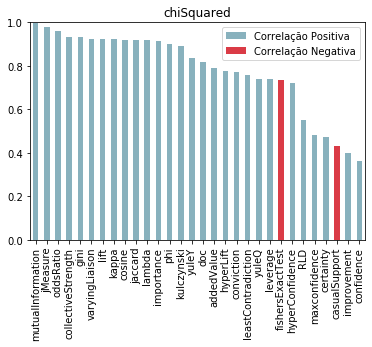

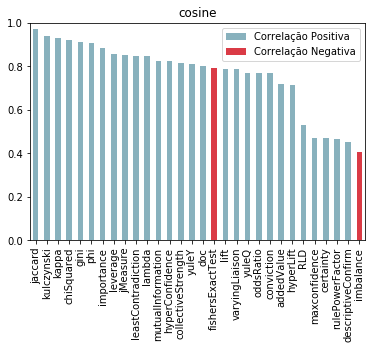

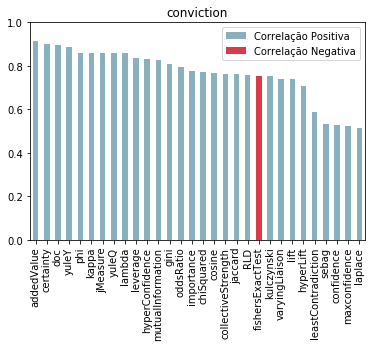

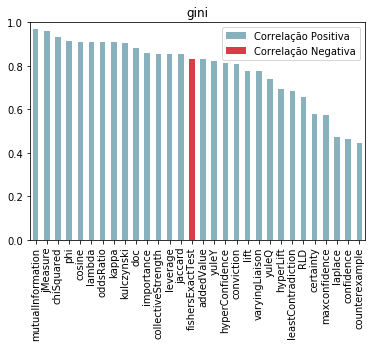

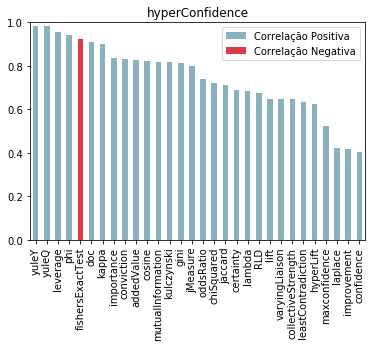

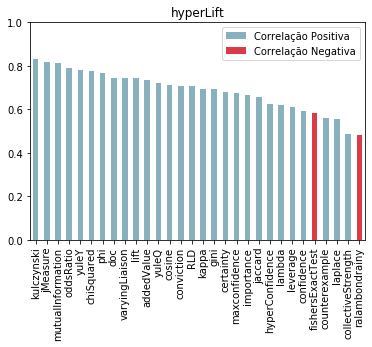

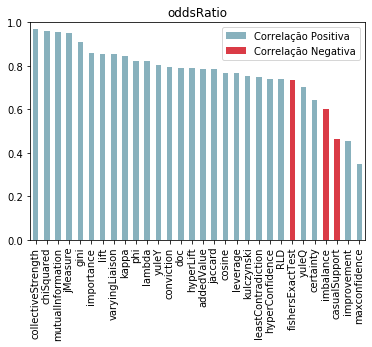

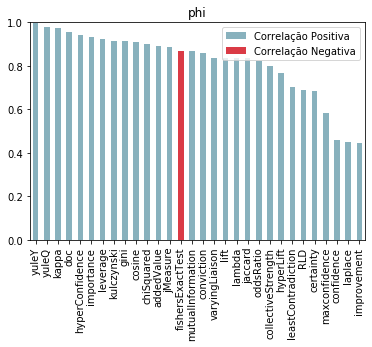

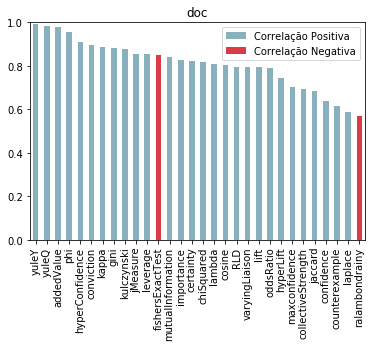

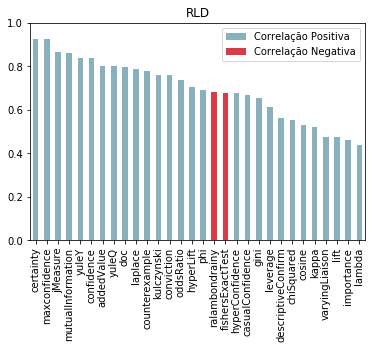

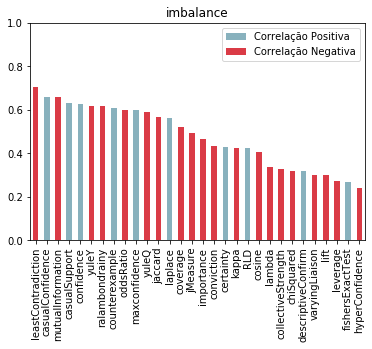

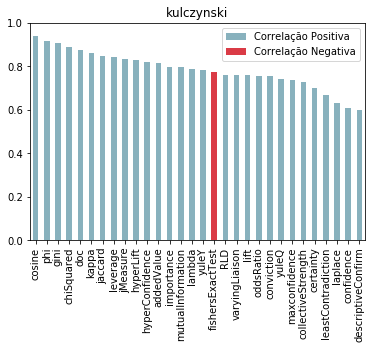

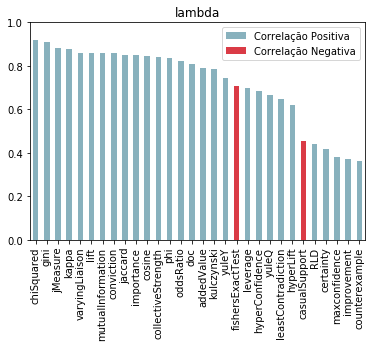

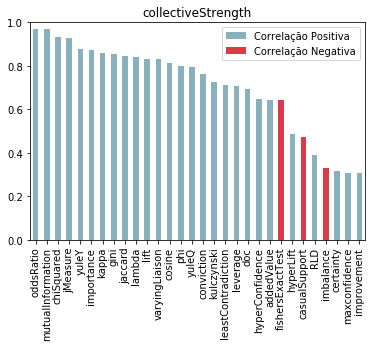

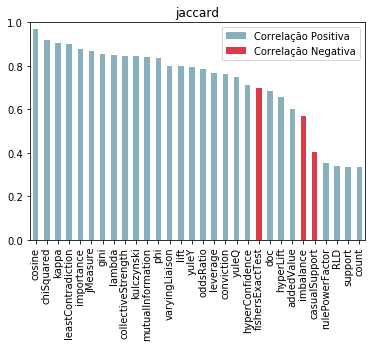

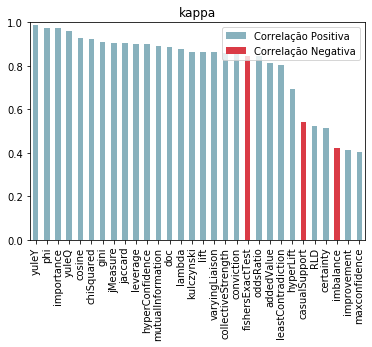

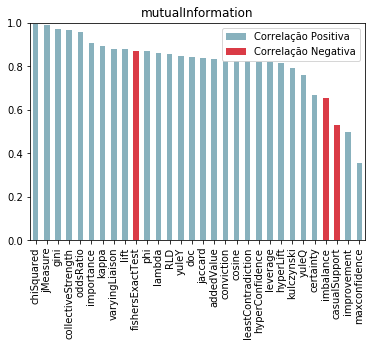

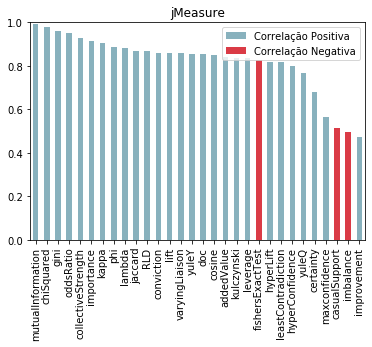

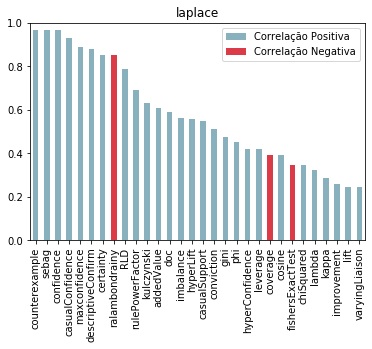

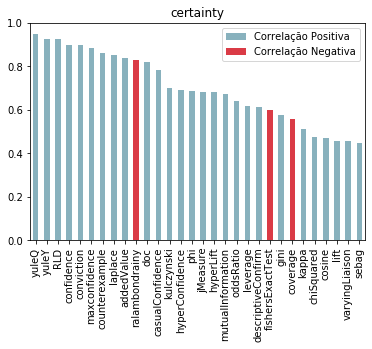

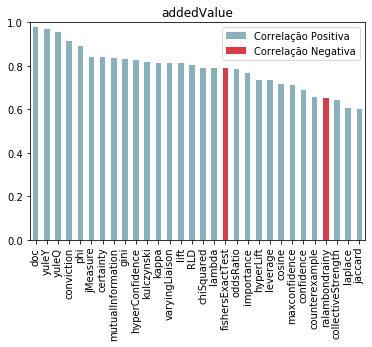

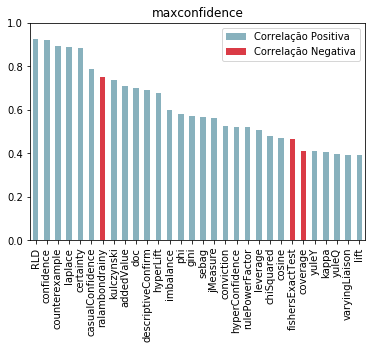

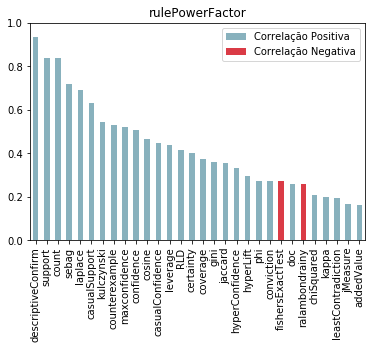

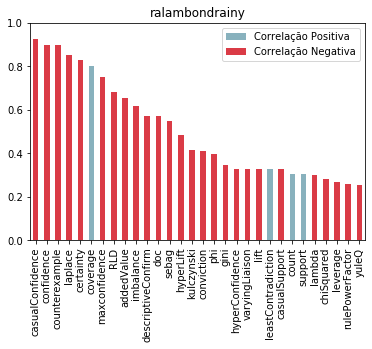

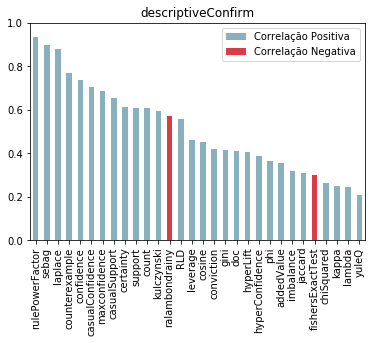

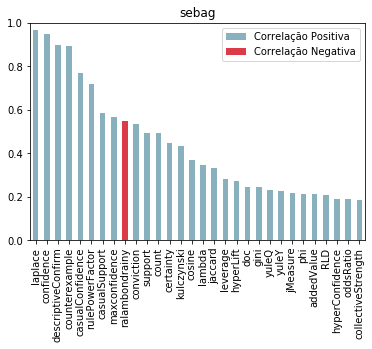

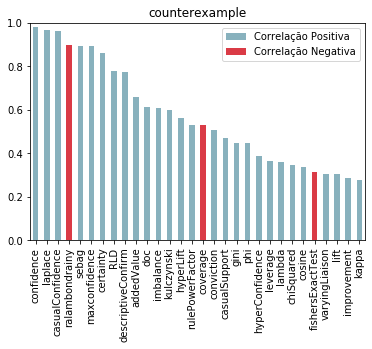

In [ ]:
 for i in df.columns:
    data = pd.DataFrame(data=df[i].abs())
    data['Correlação Positiva'] = np.where(df[i] >= 0, df[i], 0)
    data['Correlação Negativa'] = np.where(df[i] < 0, np.abs(df[i]), 0)
    
    data = data.sort_values(by=[i], ascending=False)
    data = data.drop(columns=i, index=i)
    
    vermelho = cmap(-0.2)
    azul = cmap(0.8)
    data = data.head(30)
    ax = data.plot(kind='bar', title=i, color=[azul, vermelho], stacked=True)
    ax.set_ylim(0, 1)
    
    plt.show()
    plt.close()
    del data